In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import re 
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.shape

(404290, 6)

In [4]:
new_df = df.sample(100000,random_state = 2)

In [5]:
import re

In [6]:
# Simple Preprocessing
def preprocess(q):
    q = str(q).lower().strip()
    # Replace certain Special Charachters with their String Equivalents
    q = q.replace('%','precent')
    q = q.replace('$','dollar')
    q= q.replace('₹','rupee')
    q = q.replace('€','euros')
    q =q.replace('@','at')

    # the pattern '[math]' appears around 900 times in whole dataset
    q = q.replace('[math]','')

    # Replacing some numbers with strign Equivalents (not perfect could be improved)
    q = q.replace(',000,000,000 ' ,'b ')
    q = q.replace(',000,000, ','m ')
    q = q.replace(',000 ','k ')
    q = re.sub(r'([0-9]+)000000000',r'\1b',q)
    q = re.sub(r'([0-9]+)000000',r'\1m',q)
    q = re.sub(r'([0-9]+)000',r'\1k',q)

    # Contracting words
    contractions = {
    "ain't": "am not / are not / is not / has not / have not",
    "aren't": "are not / am not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he had / he would",
    "he'd've": "he would have",
    "he'll": "he shall / he will",
    "he'll've": "he shall have / he will have",
    "he's": "he has / he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how has / how is / how does",
    "I'd": "I had / I would",
    "I'd've": "I would have",
    "I'll": "I shall / I will",
    "I'll've": "I shall have / I will have",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it had / it would",
    "it'd've": "it would have",
    "it'll": "it shall / it will",
    "it'll've": "it shall have / it will have",
    "it's": "it has / it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she had / she would",
    "she'd've": "she would have",
    "she'll": "she shall / she will",
    "she'll've": "she shall have / she will have",
    "she's": "she has / she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as / so is",
    "that'd": "that would / that had",
    "that'd've": "that would have",
    "that's": "that has / that is",
    "there'd": "there had / there would",
    "there'd've": "there would have",
    "there's": "there has / there is",
    "they'd": "they had / they would",
    "they'd've": "they would have",
    "they'll": "they shall / they will",
    "they'll've": "they shall have / they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had / we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what shall / what will",
    "what'll've": "what shall have / what will have",
    "what're": "what are",
    "what's": "what has / what is",
    "what've": "what have",
    "when's": "when has / when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where has / where is",
    "where've": "where have",
    "who'll": "who shall / who will",
    "who'll've": "who shall have / who will have",
    "who's": "who has / who is",
    "who've": "who have",
    "why's": "why has / why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you had / you would",
    "you'd've": "you would have",
    "you'll": "you shall / you will",
    "you'll've": "you shall have / you will have",
    "you're": "you are",
    "you've": "you have"
   
    }
    q_decontracted = []
    for word in q.split():
        if word in contractions:
            word = contractions[word]
        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve","have")
    q = q.replace("n't"," not")
    q = q.replace(" 're","are")
    q = q.replace("'ll"," will")

    # Removing Html tags
    q = BeautifulSoup(q)
    q = q.get_text()

    #Remove Punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ',q).strip()


    return q




In [7]:
new_df['question1'] = new_df['question1'].apply(preprocess)
new_df['question2'] = new_df['question2'].apply(preprocess)

In [8]:
# for questions in (list(new_df[new_df['is_duplicate']==1]['question1']) + list(new_df[new_df['is_duplicate']==1]['question2'])):
#     print(quetions)

SyntaxError: incomplete input (257553711.py, line 2)

# Feature Engineering

In [9]:
new_df['q1_len'] = new_df['question1'].str.len()
new_df['q2_len'] = new_df['question2'].str.len()


In [11]:
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,48,56
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,104,119
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0,58,145
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,34,49
...,...,...,...,...,...,...,...,...
147622,147622,185363,232946,why do you live a life,why do people live what is reason for you to ...,1,22,60
353951,353951,23995,483033,why are golden retriever dogs with blue eyes s...,how do i train golden retriever dogs with blue...,0,57,51
251765,251765,177088,357433,how do i learn computer practically,what is the best way to learn computer languages,0,35,48
150383,150383,221786,236690,i want to start a new business in india appro...,what are some good ideas for small industries ...,0,88,94


In [12]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row : len(row.split()))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row : len(row.split()))


In [13]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76,13,13
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,48,56,12,15
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,104,119,26,20
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0,58,145,13,30
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,34,49,5,9


In [14]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(),row['question1'].split()))
    w2 = set(map(lambda word: word.lower().strip(),row['question2'].split()))
    return len(w1 & w2)

In [15]:
new_df['word_common'] = new_df.apply(common_words,axis=1)

In [16]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(),row['question1'].split()))
    w2 = set(map(lambda word: word.lower().strip(),row['question2'].split()))
    return len(w1 + w2)

In [17]:
new_df['word_total'] = new_df.apply(common_words,axis=1)

In [18]:
new_df ['word_share'] = round(new_df['word_common']/(new_df['word_total']+0.1),2)

In [19]:
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76,13,13,12,12,0.99
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,48,56,12,15,7,7,0.99
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,104,119,26,20,3,3,0.97
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0,58,145,13,30,0,0,0.00
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,34,49,5,9,3,3,0.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...
147622,147622,185363,232946,why do you live a life,why do people live what is reason for you to ...,1,22,60,6,13,5,5,0.98
353951,353951,23995,483033,why are golden retriever dogs with blue eyes s...,how do i train golden retriever dogs with blue...,0,57,51,10,10,6,6,0.98
251765,251765,177088,357433,how do i learn computer practically,what is the best way to learn computer languages,0,35,48,6,9,2,2,0.95
150383,150383,221786,236690,i want to start a new business in india appro...,what are some good ideas for small industries ...,0,88,94,18,18,5,5,0.98


In [20]:
# Advanced Features
from nltk.corpus import stopwords

def fetch_token_features(row):

    q1 = row['question1']
    q2 = row['question2']

    Safe_DIV = 0.0001

    STOP_WORDS = stopwords.words('english')

    # if any problem occurs
    token_features = [0.0] * 8

    # Converting the sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if(len(q1_tokens) == 0 or len(q2_tokens) == 0):
        return token_features

    # Fetching non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])

    # Getting the stopwords 
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])

    # Getting common words form question pair
    common_word_count = len(q1_words.intersection(q2_words))

    # Getting the common Stopwords

    common_stop_count = len(q1_stops.intersection(q2_stops))

    # Getting the common tokens

    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))

    # Common word_count / word_count question
    token_features[0] = common_word_count / (min(len(q1_words),len(q2_words)) + Safe_DIV)
    token_features[1] = common_word_count / (max(len(q1_words),len(q2_words)) + Safe_DIV)

    # Common_stop_words 
    token_features[2] = common_stop_count / (min(len(q1_stops),len(q2_stops)) + Safe_DIV)
    token_features[3] =common_stop_count / (max(len(q1_stops),len(q2_stops)) + Safe_DIV)

    token_features[4] =  common_token_count /(min(len(q1_tokens),len(q2_tokens)) + Safe_DIV)
    token_features[5] =  common_token_count /(max(len(q1_tokens),len(q2_tokens)) + Safe_DIV)

    # last Word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])

    # First Word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])

    return token_features    

    
    
    

    
    

In [21]:
token_features = new_df.apply(fetch_token_features,axis=1)

new_df["cwc_min"] = list(map(lambda x : x[0],token_features))
new_df["cwc_max"] = list(map(lambda x :x[1],token_features))
new_df["csc_min"] = list(map(lambda x :x[2],token_features))
new_df["csc_max"] = list(map(lambda x :x[3],token_features))
new_df["ctc_min"] = list(map(lambda x :x[4],token_features))
new_df["ctc_max"] = list(map(lambda x :x[5],token_features))
new_df["last_word_eq"] =  list(map(lambda x :x[6],token_features))
new_df["first_word_eq"] = list(map(lambda x :x[7],token_features))


In [22]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,word_total,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76,13,13,...,12,0.99,0.874989,0.874989,0.999980,0.999980,0.923070,0.923070,1.0,1.0
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,48,56,12,15,...,7,0.99,0.666644,0.499988,0.714276,0.624992,0.583328,0.466664,1.0,1.0
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,104,119,26,20,...,3,0.97,0.000000,0.000000,0.428565,0.272725,0.149999,0.115384,0.0,0.0
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0,58,145,13,30,...,0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,34,49,5,9,...,3,0.97,0.749981,0.599988,0.000000,0.000000,0.599988,0.333330,1.0,0.0


# Length_based_Features

In [23]:
import distance 

In [24]:
def fetch_length_feature(row):
    q1 = row['question1'] 
    q2 = row['question2']

    length_features = [0.0] *3

# Converting the Sentence into Tokens
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if(len(q1_tokens) == 0 or len(q2_tokens) == 0):
        return length_features

    #Absolute length Features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))

     # Absolute Token Lengths of both questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2

    strs = list(distance.lcsubstrings(q1,q2))
    length_features[2] = len(strs[0])/ (min(len(q1),len(q2)) + 1)

    return length_features

In [25]:
length_features = new_df.apply(fetch_length_feature, axis=1)

new_df['abs_len_diff'] = list(map(lambda x : x[0] ,length_features))
new_df['mean_len'] = list(map(lambda x :x[1] , length_features))
new_df['longest_substr_ratio'] = list(map(lambda x : x[2] ,length_features))

In [26]:
new_df['word_share']

398782    0.99
115086    0.99
327711    0.97
367788    0.00
151235    0.97
          ... 
147622    0.98
353951    0.98
251765    0.95
150383    0.98
165218    0.98
Name: word_share, Length: 100000, dtype: float64

In [27]:
from fuzzywuzzy import fuzz

def Fetch_Fuzzy_Features(row):

    q1 = row['question1']
    q2 = row['question2']

    fuzzy_features = [0*0] * 4

    #Fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1,q2)

    # Fuzz_partial_ratio

    fuzzy_features[1] = fuzz.partial_ratio(q1,q2)

    # Token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1,q2)

    # token_set_ratio

    fuzzy_features[3] = fuzz.token_set_ratio(q1,q2)

    return fuzzy_features


In [28]:
fuzzy_features = new_df.apply(Fetch_Fuzzy_Features,axis=1)

In [29]:
# Creating the new features for the fuzzy features

new_df['fuzz_ratio'] = list(map(lambda x:x[0],fuzzy_features))
new_df['fuzz_partial_ratio'] = list(map(lambda x:x[1],fuzzy_features))
new_df['token_sort_ratio'] = list(map(lambda x:x[2],fuzzy_features))
new_df['token_set_ratio'] = list(map(lambda x : x[3],fuzzy_features))

In [30]:
print(new_df.shape)
new_df.head()

(100000, 28)


,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76,13,13,...,0.923070,1.0,1.0,0.0,13.0,0.855263,99,99,99,99
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,48,56,12,15,...,0.466664,1.0,1.0,3.0,13.5,0.224490,69,67,65,74
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,104,119,26,20,...,0.115384,0.0,0.0,6.0,23.0,0.047619,26,29,34,43
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0,58,145,13,30,...,0.000000,0.0,0.0,17.0,21.5,0.050847,29,41,23,30
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,34,49,5,9,...,0.333330,1.0,0.0,4.0,7.0,0.542857,55,70,48,69


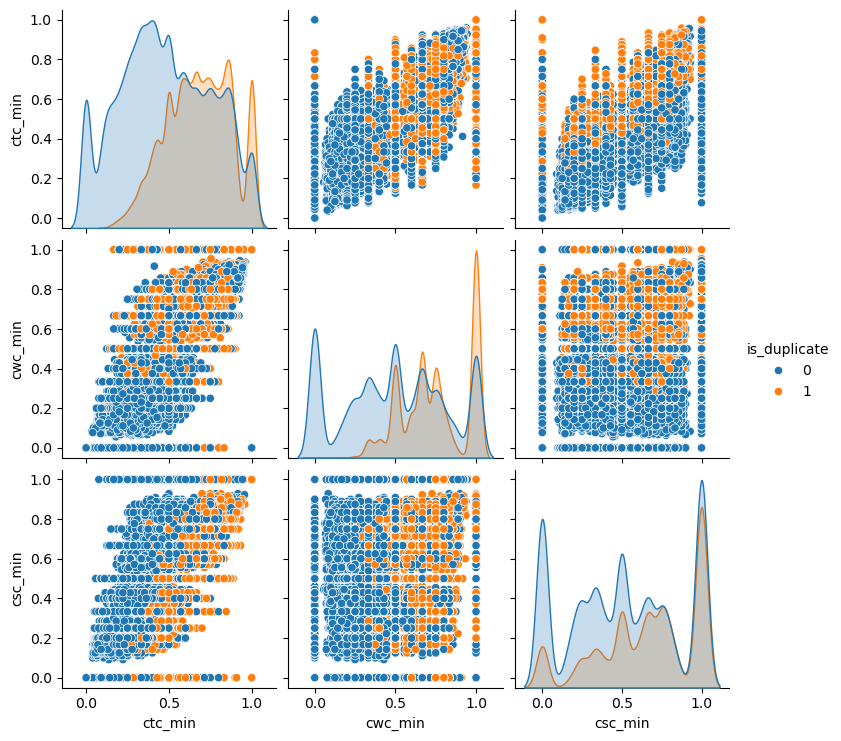

In [31]:
sns.pairplot(new_df[['ctc_min','cwc_min','csc_min','is_duplicate']],hue = 'is_duplicate')

In [32]:
## Cwc_min and Ctc_min we can clearly see thats there is difference in duplicate and non_duplicate words features
## Csc_min shows that non_duplicate words are having more common stop words than duplicate words 
## In cocnlusion all 3 are useful features 

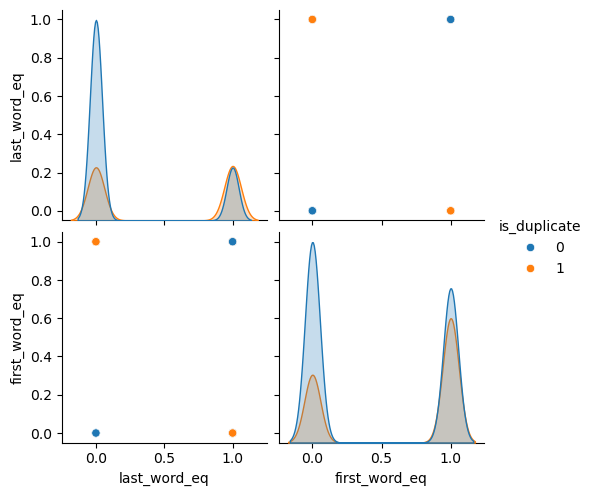

In [33]:
sns.pairplot(new_df[['last_word_eq','first_word_eq','is_duplicate']],hue = 'is_duplicate')

In [34]:
# Analysing the length_based_features

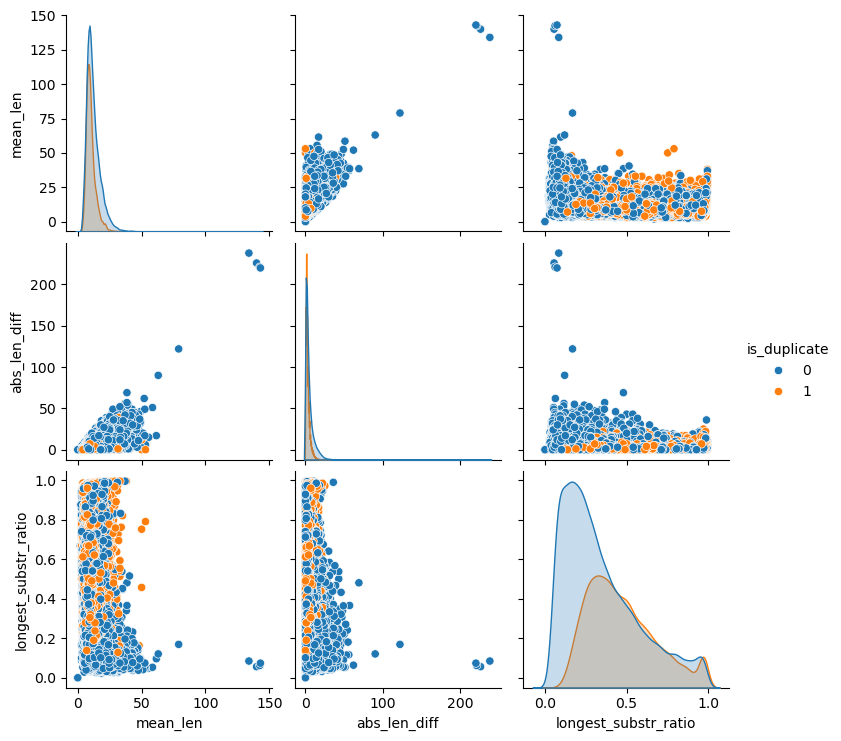

In [35]:
sns.pairplot(new_df[['mean_len','abs_len_diff','longest_substr_ratio','is_duplicate']],hue = 'is_duplicate')

In [36]:
## Abs_len_diff and mean_len diff have the same distribtion, 
## Interestingly the longest_substr tells that non_duplicate questions have less long_substr but relatively they have more common substr than duplicate questions

In [37]:
# Fuzzy ratios 

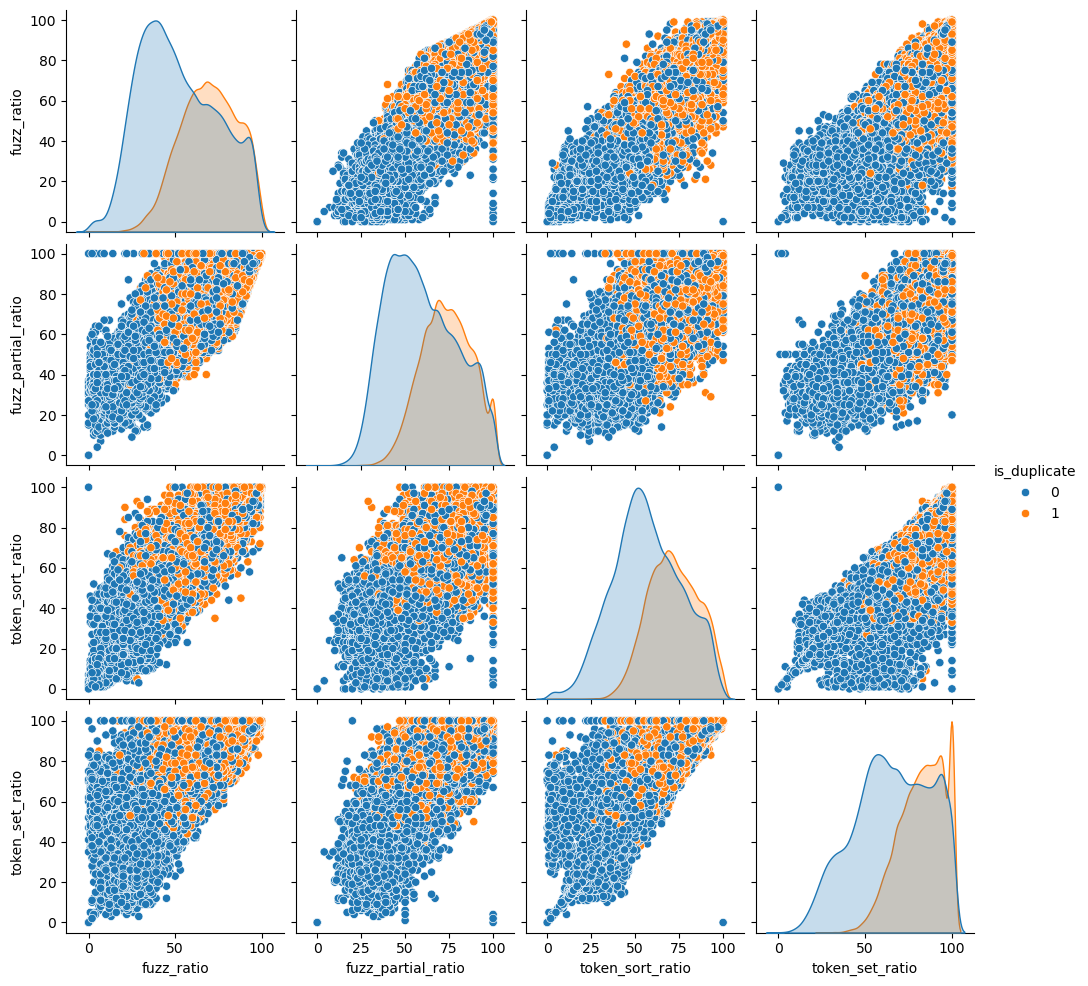

In [38]:
sns.pairplot(new_df[['fuzz_ratio','fuzz_partial_ratio','token_sort_ratio','token_set_ratio','is_duplicate']],hue = 'is_duplicate')

In [39]:
# Dimensionlaity Reduction

In [40]:
# Using TSNE for Dimensionlaity Reduction for 15 features (Generated after cleaning the data) to 3 dimensions 

from sklearn.preprocessing import MinMaxScaler 
X = MinMaxScaler().fit_transform(new_df[['cwc_min','cwc_max','csc_min','csc_max','ctc_min','ctc_max','last_word_eq','first_word_eq','fuzz_ratio','fuzz_partial_ratio','token_sort_ratio','token_set_ratio','longest_substr_ratio']])
y = new_df['is_duplicate'].values

In [41]:
# Let's try adding soem more Features
# So on top of existing features can we try increasing some features to 

In [42]:
# 

In [43]:
from sklearn.manifold import TSNE

tsne2d = TSNE (
    n_components =2,
    init = 'random', #pca
    random_state = 101,
    method = 'barnes_hut',
    n_iter = 1000,
    verbose = 2,
    angle = 0.5).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 100000 samples in 0.838s...
[t-SNE] Computed neighbors for 100000 samples in 124.213s...
[t-SNE] Computed conditional probabilities for sample 1000 / 100000
[t-SNE] Computed conditional probabilities for sample 2000 / 100000
[t-SNE] Computed conditional probabilities for sample 3000 / 100000
[t-SNE] Computed conditional probabilities for sample 4000 / 100000
[t-SNE] Computed conditional probabilities for sample 5000 / 100000
[t-SNE] Computed conditional probabilities for sample 6000 / 100000
[t-SNE] Computed conditional probabilities for sample 7000 / 100000
[t-SNE] Computed conditional probabilities for sample 8000 / 100000
[t-SNE] Computed conditional probabilities for sample 9000 / 100000
[t-SNE] Computed conditional probabilities for sample 10000 / 100000
[t-SNE] Computed conditional probabilities for sample 11000 / 100000
[t-SNE] Computed conditional probabilities for sample 12000 / 100000
[t-SNE] Computed conditional proba

In [44]:
x_df = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

x_df

,x,y,label
0,-75.415802,-21.046259,1
1,34.693638,8.733001,0
2,39.319386,69.830673,0
3,100.765884,41.248375,0
4,-10.860904,106.464371,0
...,...,...,...
99995,28.241470,39.067379,1
99996,-84.142159,43.060810,0
99997,-101.711472,-30.497665,0
99998,-38.764519,4.826834,0


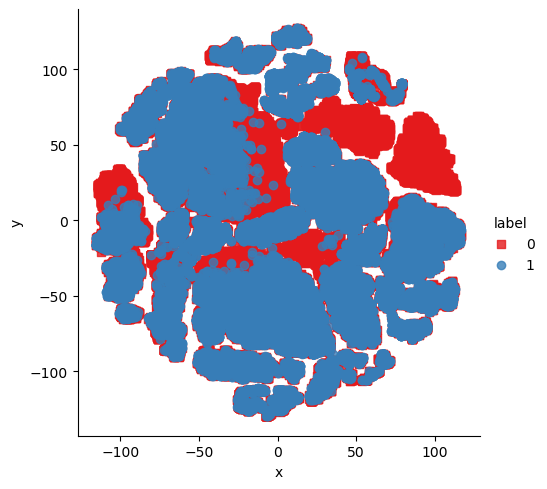

In [45]:
# draw the plot in appropriate place in the grid
sns.lmplot(data=x_df, x='x', y='y', hue='label', fit_reg=False,palette="Set1",markers=['s','o'])

In [ ]:
tsne3d = TSNE(
    n_components=3,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 100000 samples in 0.828s...
[t-SNE] Computed neighbors for 100000 samples in 116.443s...
[t-SNE] Computed conditional probabilities for sample 1000 / 100000
[t-SNE] Computed conditional probabilities for sample 2000 / 100000
[t-SNE] Computed conditional probabilities for sample 3000 / 100000
[t-SNE] Computed conditional probabilities for sample 4000 / 100000
[t-SNE] Computed conditional probabilities for sample 5000 / 100000
[t-SNE] Computed conditional probabilities for sample 6000 / 100000
[t-SNE] Computed conditional probabilities for sample 7000 / 100000
[t-SNE] Computed conditional probabilities for sample 8000 / 100000
[t-SNE] Computed conditional probabilities for sample 9000 / 100000
[t-SNE] Computed conditional probabilities for sample 10000 / 100000
[t-SNE] Computed conditional probabilities for sample 11000 / 100000
[t-SNE] Computed conditional probabilities for sample 12000 / 100000
[t-SNE] Computed conditional proba

In [ ]:
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.offline as py
py.init_notebook_mode(connected=True)

trace1 = go.Scatter3d(
    x=tsne3d[:,0],
    y=tsne3d[:,1],
    z=tsne3d[:,2],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        color = y,
        colorscale = 'Portland',
        colorbar = dict(title = 'duplicate'),
        line=dict(color='rgb(255, 255, 255)'),
        opacity=0.75
    )
)

data=[trace1]
layout=dict(height=800, width=800, title='3d embedding with engineered features')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')

In [ ]:
## Now we will split the df into questions and other features (As we have to vectorise the words )

In [ ]:
ques_df = new_df[['question1','question2']]


In [ ]:
final_df = new_df.drop(['id','qid1','qid2','question1','question2'],axis=1)
print(final_df.shape)
final_df.head()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Merge Texts 
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features =3000)
q1_arr,q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [ ]:
temp_df1 = pd.DataFrame(q1_arr,index = ques_df.index)
temp_df2 = pd.DataFrame(q2_arr,index = ques_df.index)
temp_df = pd.concat([temp_df1,temp_df2],axis=1)
temp_df

In [ ]:
final_df = pd.concat([final_df,temp_df],axis=1)


In [ ]:
final_df

In [ ]:
final_df.iloc[:,1:].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size =0.2,random_state = 42)

In [ ]:
X_train

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score
rf= RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)


In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred1=  xgb.predict(X_test)
accuracy_score(y_test,y_pred1)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
#for random forest  model
confusion_matrix(y_test,y_pred)

In [ ]:
# For XGBoost
confusion_matrix(y_test,y_pred1)